# River sensitivity run influence

Just for year 2002

June, 2019

In [3]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
from pylab import *
import matplotlib
import warnings
import pickle
warnings.filterwarnings("ignore")

%matplotlib notebook

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

| Run ID    | River forcing file               |
|-----------|----------------------------------|
| riv_2a    | river_input-glacier-enhanced.nc  |
| riv_2b    | river_input-decrease-case.nc     |
| riv_2c    | river_input-increase-case.nc     |
| riv_base  | river_input-base-case.nc         |

In [6]:
run_folder1= '/data/brogalla/run_storage/riv_2a_2019-06-06T170300.826288-0400/'
run_folder2= '/data/brogalla/run_storage/riv_2b_2019-06-06T170326.571896-0400/'
run_folder3= '/data/brogalla/run_storage/riv_2c_2019-06-06T170345.018091-0400/'
run_folder4= '/data/brogalla/run_storage/riv_base_2019-06-06T170441.357599-0400/'
monthly_ave  = 'ANHA12_EXH006_2002_monthly.nc'
monthly_diff = 'ANHA12_EXH006_2002_monthly_diff.nc'

Mask land values

In [7]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
tmask = tmask[0,:,1480:2050,200:800]
tmask_full_ave     = np.zeros((12, 50, 570, 600))
tmask_full_ave[:]  = tmask

In [8]:
def load_monthly(storage, var=monthly_ave, mask_ave=tmask_full_ave, diff=False):
    
    test_ave  = nc.Dataset(storage+var)
    dmn_ave   = np.array(test_ave.variables['dissolmn'])
    omn_ave   = np.array(test_ave.variables['oxidismn'])
    
    #apply land mask
    if diff:
        mask_new = mask_ave[0:11,:,:,:]
        cond_ave  = (mask_new  < 0.1)
    else:
        cond_ave  = (mask_ave  < 0.1)
        
    dmn_mave  = np.ma.masked_where(cond_ave, dmn_ave[:,0,:,:,:]) 
    omn_mave  = np.ma.masked_where(cond_ave, omn_ave[:,0,:,:,:]) 
    
    return dmn_mave*1e9, omn_mave*1e9 # convert to nM

In [9]:
riv_2a_dave,  riv_2a_oave  = load_monthly(run_folder1)
riv_2a_ddiff, riv_2a_odiff = load_monthly(run_folder1, var=monthly_diff, diff=True)

riv_2b_dave,  riv_2b_oave  = load_monthly(run_folder2)
riv_2b_ddiff, riv_2b_odiff = load_monthly(run_folder2, var=monthly_diff, diff=True)

riv_2c_dave,  riv_2c_oave  = load_monthly(run_folder3)
riv_2c_ddiff, riv_2c_odiff = load_monthly(run_folder3, var=monthly_diff, diff=True)

riv_base_dave,  riv_base_oave  = load_monthly(run_folder4)
riv_base_ddiff, riv_base_odiff = load_monthly(run_folder4, var=monthly_diff, diff=True)

In [10]:
print('Dissolved Mn in riv_2a:')
print('Ave: ', np.amax(riv_2a_dave), np.amin(riv_2a_dave), np.average(riv_2a_dave))
print('Diff: ', np.amax(riv_2a_ddiff), np.amin(riv_2a_ddiff), np.average(riv_2a_ddiff))
print('Dissolved Mn in riv_2b:')
print('Ave: ', np.amax(riv_2b_dave), np.amin(riv_2b_dave), np.average(riv_2b_dave))
print('Diff: ', np.amax(riv_2b_ddiff), np.amin(riv_2b_ddiff), np.average(riv_2b_ddiff))
print('Dissolved Mn in riv_2c:')
print('Ave: ', np.amax(riv_2c_dave), np.amin(riv_2c_dave), np.average(riv_2c_dave))
print('Diff: ', np.amax(riv_2c_ddiff), np.amin(riv_2c_ddiff), np.average(riv_2c_ddiff))
print('Dissolved Mn in riv_base:')
print('Ave: ', np.amax(riv_base_dave), np.amin(riv_base_dave), np.average(riv_base_dave))
print('Diff: ', np.amax(riv_base_ddiff), np.amin(riv_base_ddiff), np.average(riv_base_ddiff))

Dissolved Mn in riv_2a:
Ave:  108.33504 0.0 3.4908907005050103
Diff:  72.02641 -54.396915 0.1999036295058886
Dissolved Mn in riv_2b:
Ave:  56.256527 0.0 3.4647253958920494
Diff:  36.743843 -35.12014 0.1964159893061623
Dissolved Mn in riv_2c:
Ave:  160.42442 0.0 3.498821389422683
Diff:  107.654526 -82.31261 0.201201548301067
Dissolved Mn in riv_base:
Ave:  108.33504 0.0 3.4817980514698554
Diff:  72.02641 -54.396915 0.1988110943160924


In [11]:
print('Oxidised Mn in riv_2a:')
print('Ave: ', np.amax(riv_2a_oave), np.amin(riv_2a_oave), np.average(riv_2a_oave))
print('Diff: ', np.amax(riv_2a_odiff), np.amin(riv_2a_odiff), np.average(riv_2a_odiff))
print('Oxidised Mn in riv_2b:')
print('Ave: ', np.amax(riv_2b_oave), np.amin(riv_2b_oave), np.average(riv_2b_oave))
print('Diff: ', np.amax(riv_2b_odiff), np.amin(riv_2b_odiff), np.average(riv_2b_odiff))
print('Oxidised Mn in riv_2c:')
print('Ave: ', np.amax(riv_2c_oave), np.amin(riv_2c_oave), np.average(riv_2c_oave))
print('Diff: ', np.amax(riv_2c_odiff), np.amin(riv_2c_odiff), np.average(riv_2c_odiff))
print('Oxidised Mn in riv_base:')
print('Ave: ', np.amax(riv_base_oave), np.amin(riv_base_oave), np.average(riv_base_oave))
print('Diff: ', np.amax(riv_base_odiff), np.amin(riv_base_odiff), np.average(riv_base_odiff))

Oxidised Mn in riv_2a:
Ave:  0.36357087 0.0 0.05392702247489439
Diff:  0.12009889 -0.123092644 0.005918342343751409
Oxidised Mn in riv_2b:
Ave:  0.33475828 0.0 0.05375793964790212
Diff:  0.11792524 -0.123092644 0.005881785739347825
Oxidised Mn in riv_2c:
Ave:  0.39185494 0.0 0.05396971808524551
Diff:  0.122260936 -0.123092644 0.005930014098733655
Oxidised Mn in riv_base:
Ave:  0.36357087 0.0 0.05386409353110623
Diff:  0.12009889 -0.123092644 0.005905946812292772


Load the lons, lats, etc.

In [13]:
ref   = nc.Dataset(run_folder4+monthly_ave)
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

Load map projection

<IPython.core.display.Javascript object>


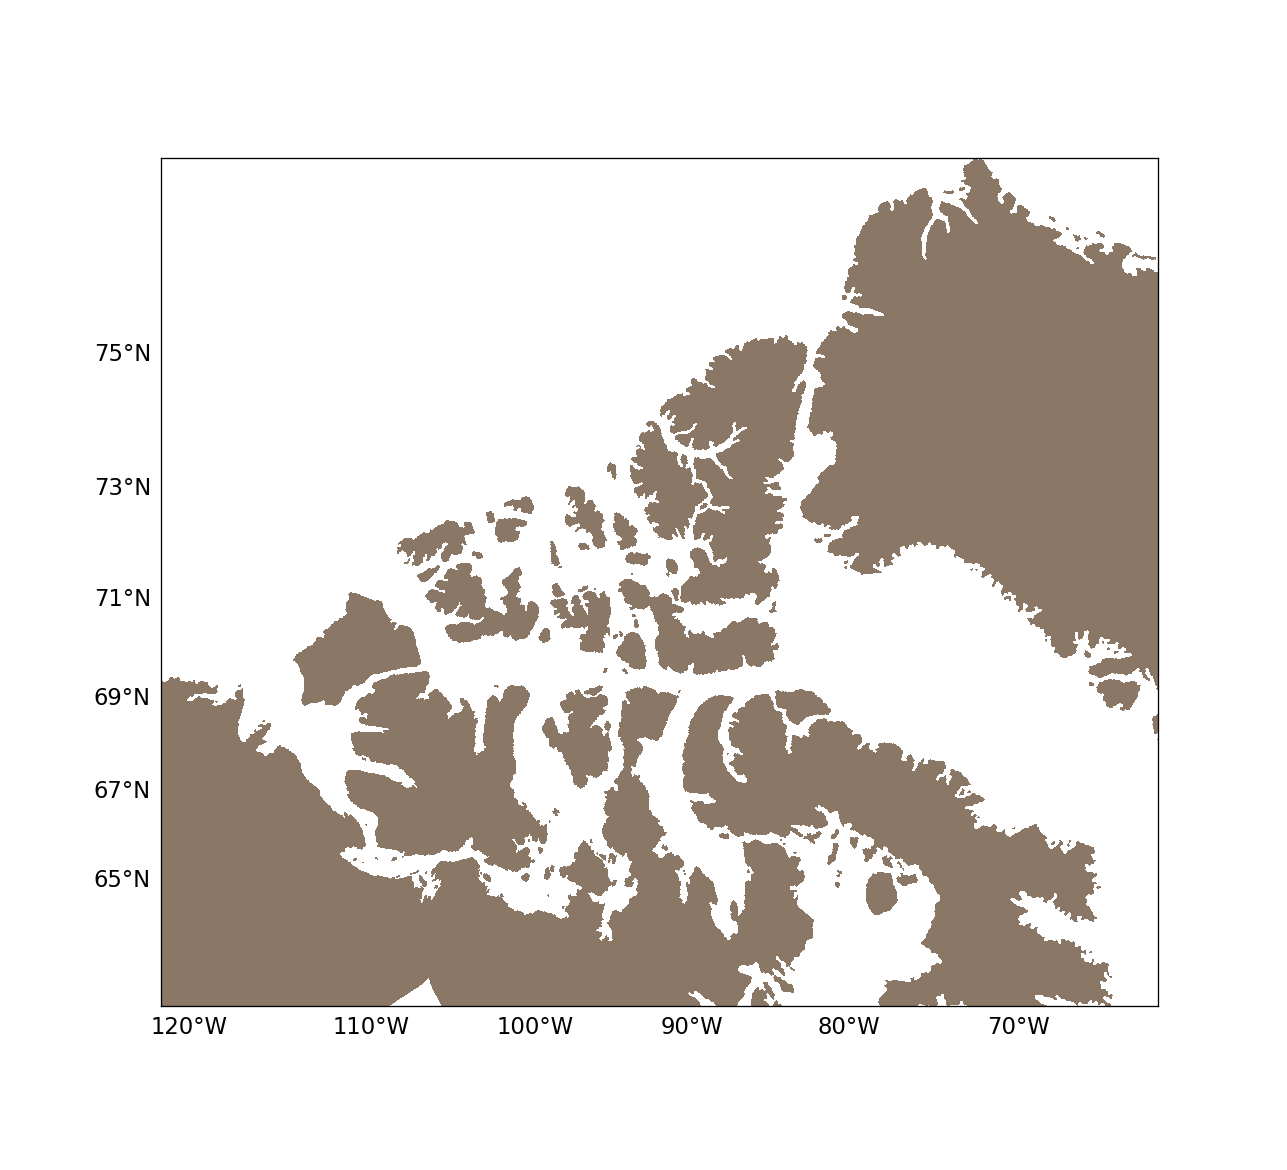

In [14]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

In [15]:
def months_overview(var, title, levels, min_v, max_v, proj=proj, ave=True):
    ax   = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn_subplotsax.pickle','rb'))
    
    x, y = proj(lons, lats)
    colour=cmocean.cm.balance
    cbar  = proj.contourf(x, y, var[0, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,0])
    proj.contourf(x, y, var[1, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,1])
    proj.contourf(x, y, var[2, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,2])
    proj.contourf(x, y, var[3, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,3])
    proj.contourf(x, y, var[4, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,0])
    proj.contourf(x, y, var[5, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,1])
    proj.contourf(x, y, var[6, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,2])
    proj.contourf(x, y, var[7, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,3])
    proj.contourf(x, y, var[8, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,0])
    proj.contourf(x, y, var[9, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,1])
    proj.contourf(x, y, var[10, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,2])
    if ave:
        proj.contourf(x, y, var[11, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,3])
    
    # figure out how to add to a different set of axes
    #plt.colorbar(jan, ax=ax[0,0])
    
    ax[0,0].set_title('January')
    ax[0,1].set_title('February')
    ax[0,2].set_title('March')
    ax[0,3].set_title('April')
    ax[1,0].set_title('May')
    ax[1,1].set_title('June')
    ax[1,2].set_title('July')
    ax[1,3].set_title('August')
    ax[2,0].set_title('September')
    ax[2,1].set_title('October')
    ax[2,2].set_title('November')
    ax[2,3].set_title('December')
    
    fig = gcf()
    fig.suptitle(title)
    cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
    fig.colorbar(cbar, cax=cbar_ax)

    return

## Glacial river trace metal concentrations enhanced:

Does a 50% increase in trace metal concentrations flowing out of glacial rivers have a strong impact on the Mn signatures in the CAA? To answer this question: compare outputs from riv_2a and riv_base runs.

No obvious visual difference when looking at the monthly averages, instead look at the difference between the two runs.

####  Difference between riv_2a and riv_base monthly averages:

In [20]:
glacial_dmn = riv_2a_dave - riv_base_dave

In [29]:
print('Glacial contribution to [dMn] monthly ave: ')
print('Max: ', np.amax(glacial_dmn[:,:,:,:]))
print('Min: ', np.amin(glacial_dmn[:,:,:,:]))
print('Ave: ', np.average(glacial_dmn[:,:,:,:]))

Glacial contribution to [dMn] monthly ave: 
Max:  20.80566
Min:  -0.42150927
Ave:  0.00909312345083027


<IPython.core.display.Javascript object>


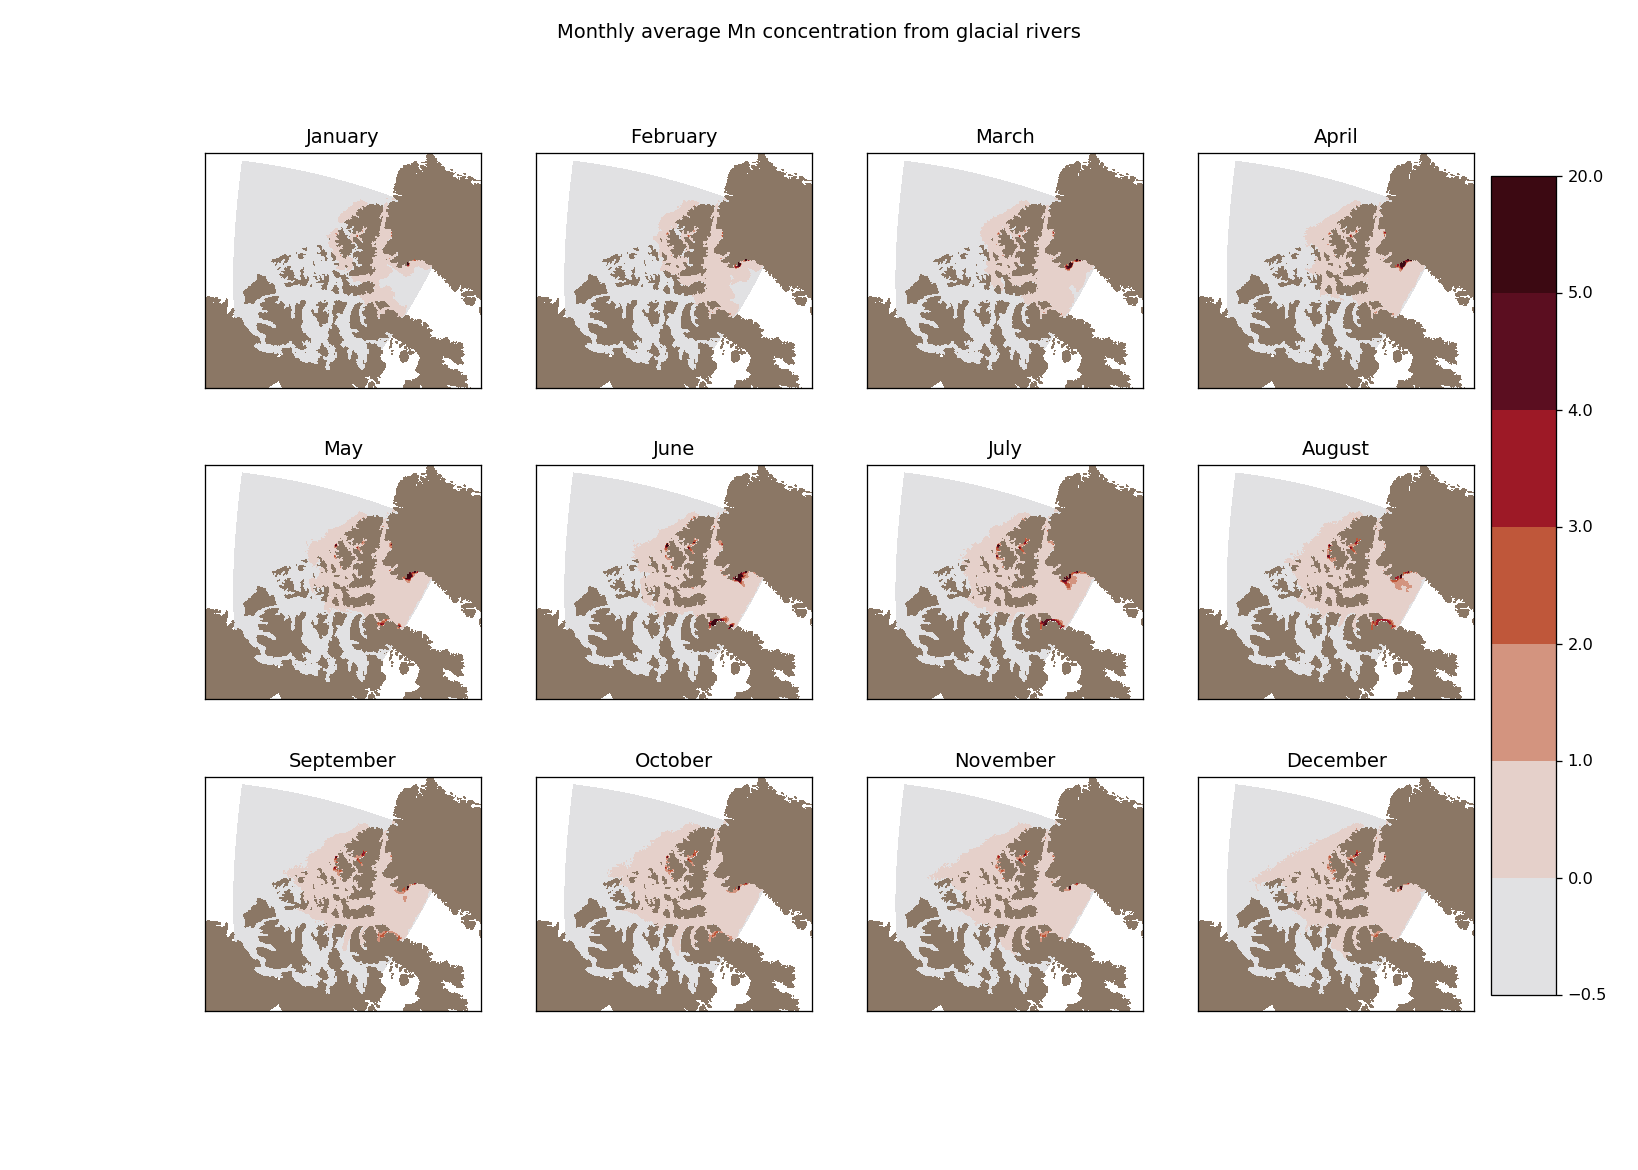

In [28]:
levels_ave = [-0.5, 0, 1, 2, 3, 4, 5, 20]
vmin  = -5
vmax  = 5
months_overview(glacial_dmn, 'Monthly average Mn concentration from glacial rivers', levels_ave, vmin, vmax)

Look at the month of June in more detail:

<IPython.core.display.Javascript object>


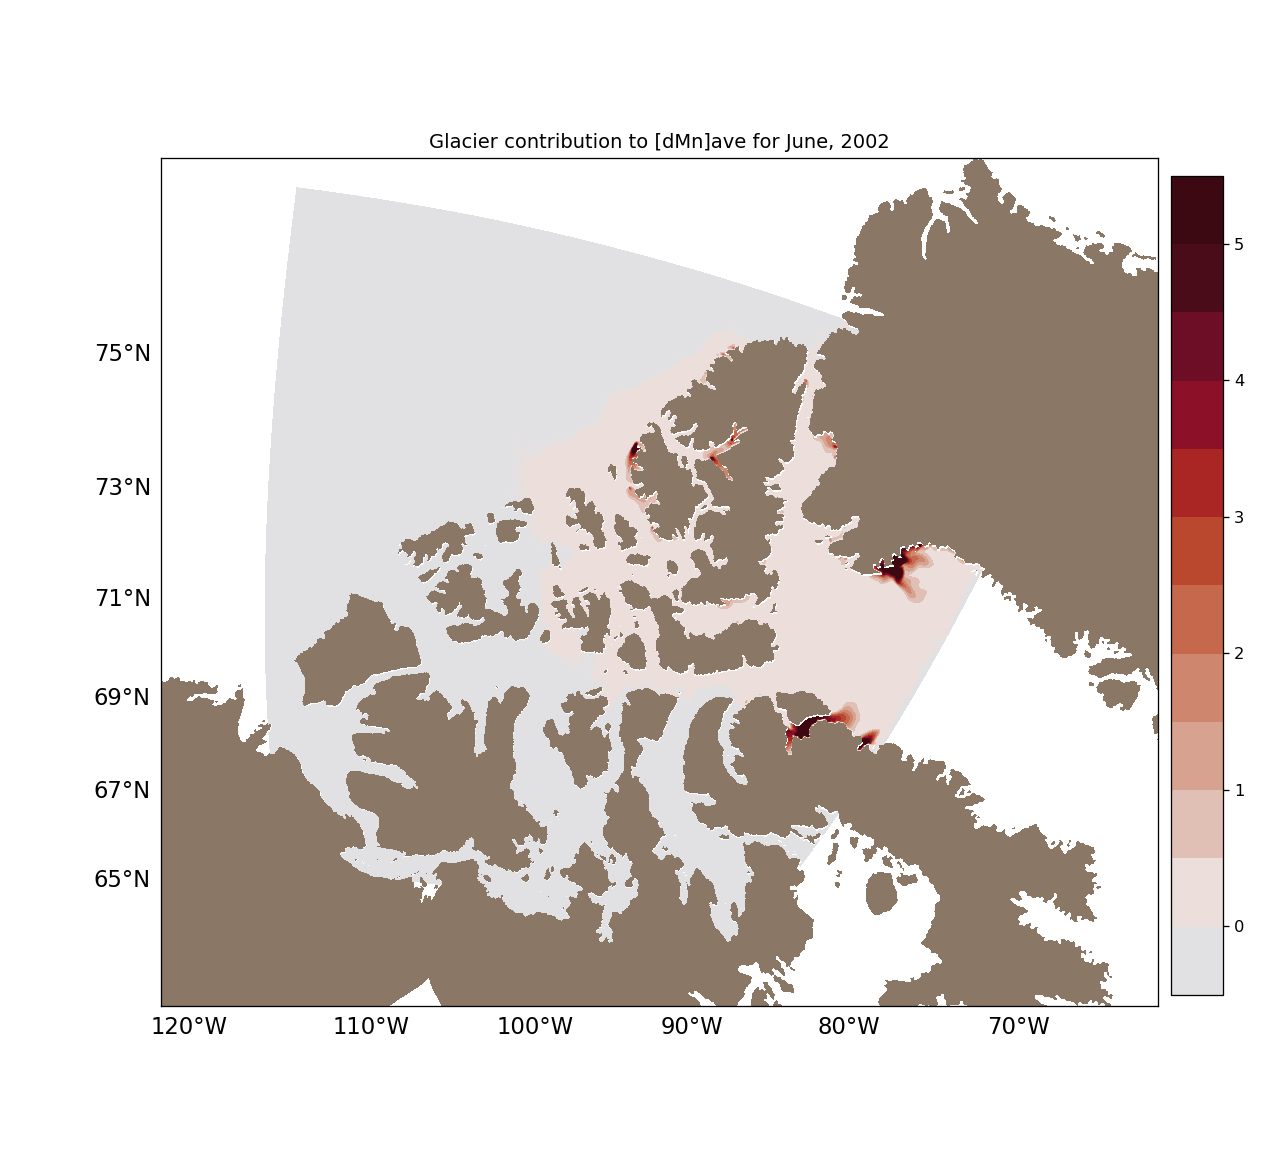

In [67]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_ave = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 20]
vmin  = -5
vmax  = 5
cbar = proj.contourf(x, y, glacial_dmn[5,0,:,:], levels_ave, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('Glacier contribution to [dMn]ave for June, 2002')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

####  Difference between month-to-month change between riv_2a and riv_base

In [36]:
glacial_dmn_diff = riv_2a_ddiff - riv_base_ddiff

In [38]:
print('Glacial contribution to [dMn] month-to-month change: ')
print('Max: ', np.amax(glacial_dmn_diff[:,:,:,:]))
print('Min: ', np.amin(glacial_dmn_diff[:,:,:,:]))
print('Ave: ', np.average(glacial_dmn_diff[:,:,:,:]))

Glacial contribution to [dMn] month-to-month change: 
Max:  9.538635
Min:  -14.642178
Ave:  0.0010928028005015439


<IPython.core.display.Javascript object>


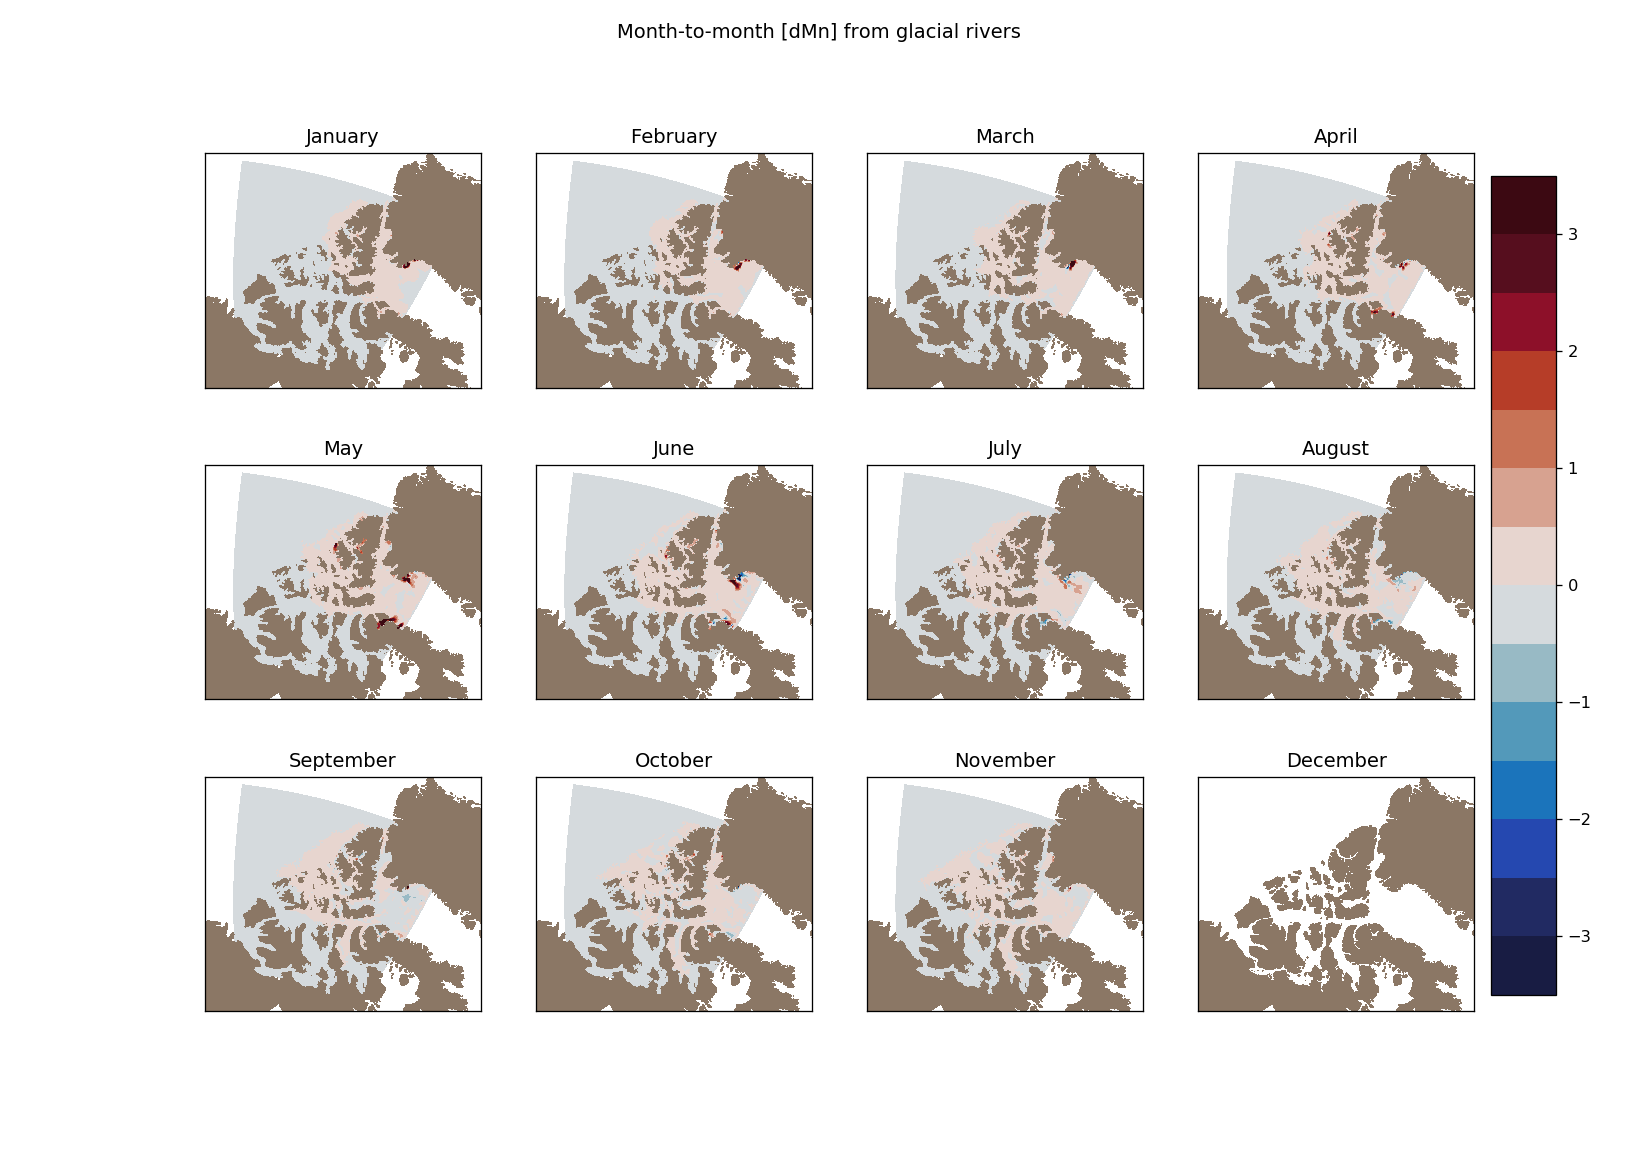

In [41]:
levels_diff = [-14, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 10]
vmin  = -3
vmax  = 3
months_overview(glacial_dmn_diff, 'Month-to-month [dMn] from glacial rivers', levels_diff, vmin, vmax, ave=False)

Look at the month of June in more detail:

<IPython.core.display.Javascript object>


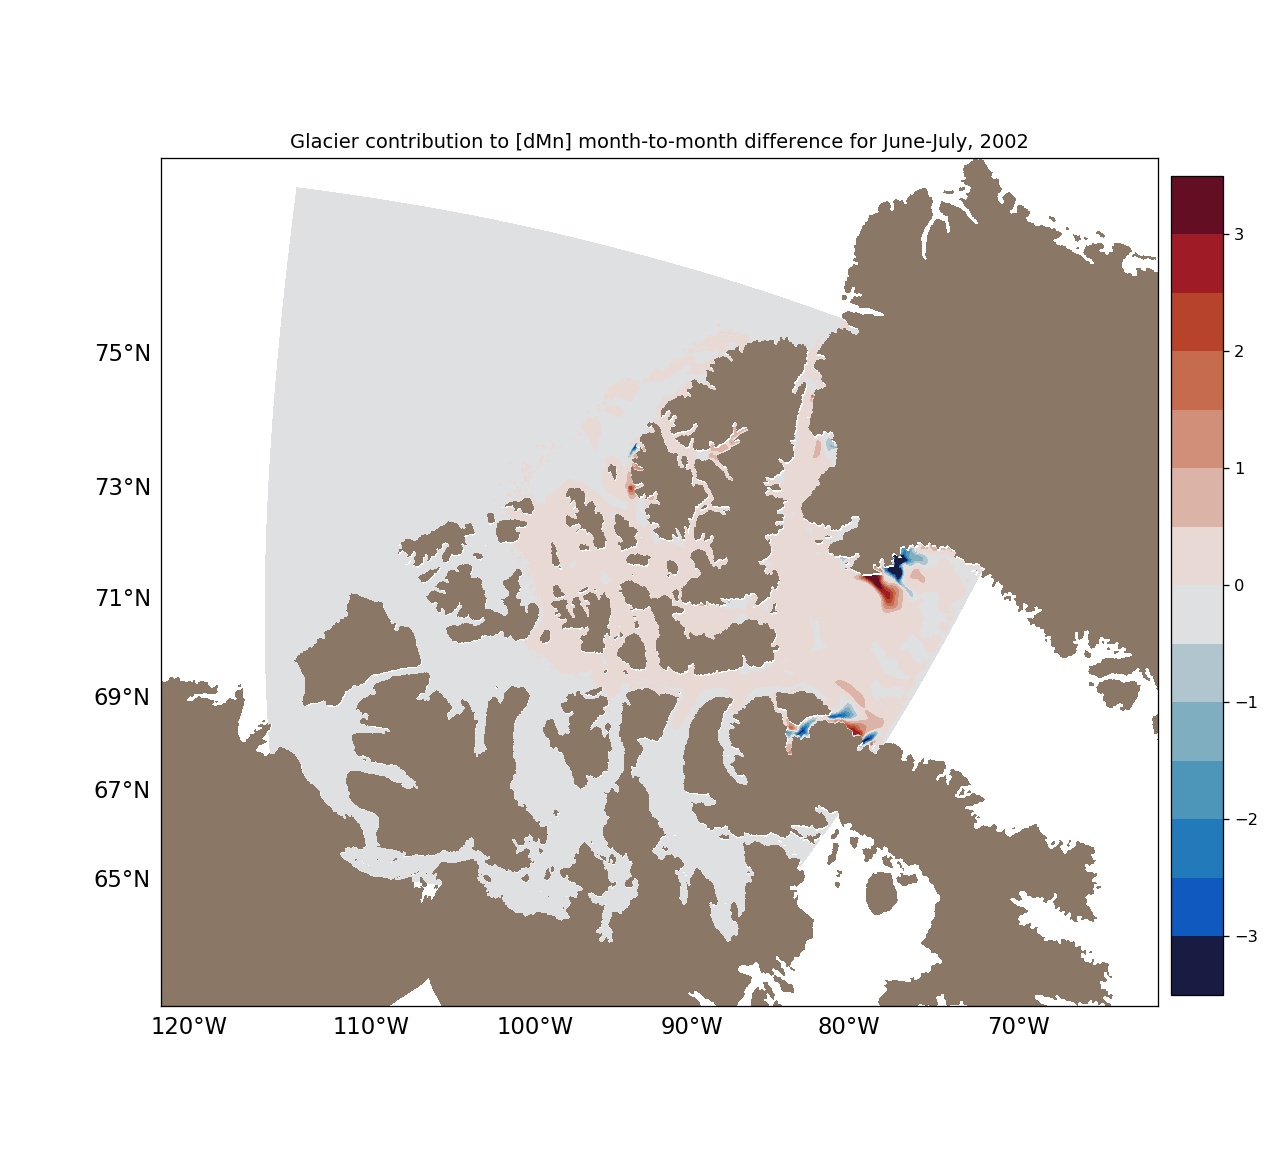

In [66]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_diff = [-15, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 4]
vmin  = -4
vmax  = 4
cbar = proj.contourf(x, y, glacial_dmn_diff[5,0,:,:], levels_diff, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('Glacier contribution to [dMn] month-to-month difference for June-July, 2002')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

Month-to-month difference gives the relative change in [dMn] at each point in space. Can be negative or positive. The difference between the run with glaciers enhanced and the base case is often positive, but may be negative as well due to changes in concentration gradients? The underlying physics is the same in both cases.

## Continental river trace metal concentrations increased:

Does a 50% increase in trace metal concentrations flowing out of continental rivers have a strong impact on the Mn signatures in the CAA? To answer this question: compare outputs from riv_2c and riv_base runs.

####  Difference between riv_2c and riv_base monthly averages:

In [68]:
up_cont_dmn = riv_2c_dave - riv_base_dave

In [69]:
print('Continental increased contribution to [dMn] monthly ave: ')
print('Max: ', np.amax(up_cont_dmn[:,:,:,:]))
print('Min: ', np.amin(up_cont_dmn[:,:,:,:]))
print('Ave: ', np.average(up_cont_dmn[:,:,:,:]))

Continental increased contribution to [dMn] monthly ave: 
Max:  52.089386
Min:  -0.5067301
Ave:  0.017028852697472438


<IPython.core.display.Javascript object>


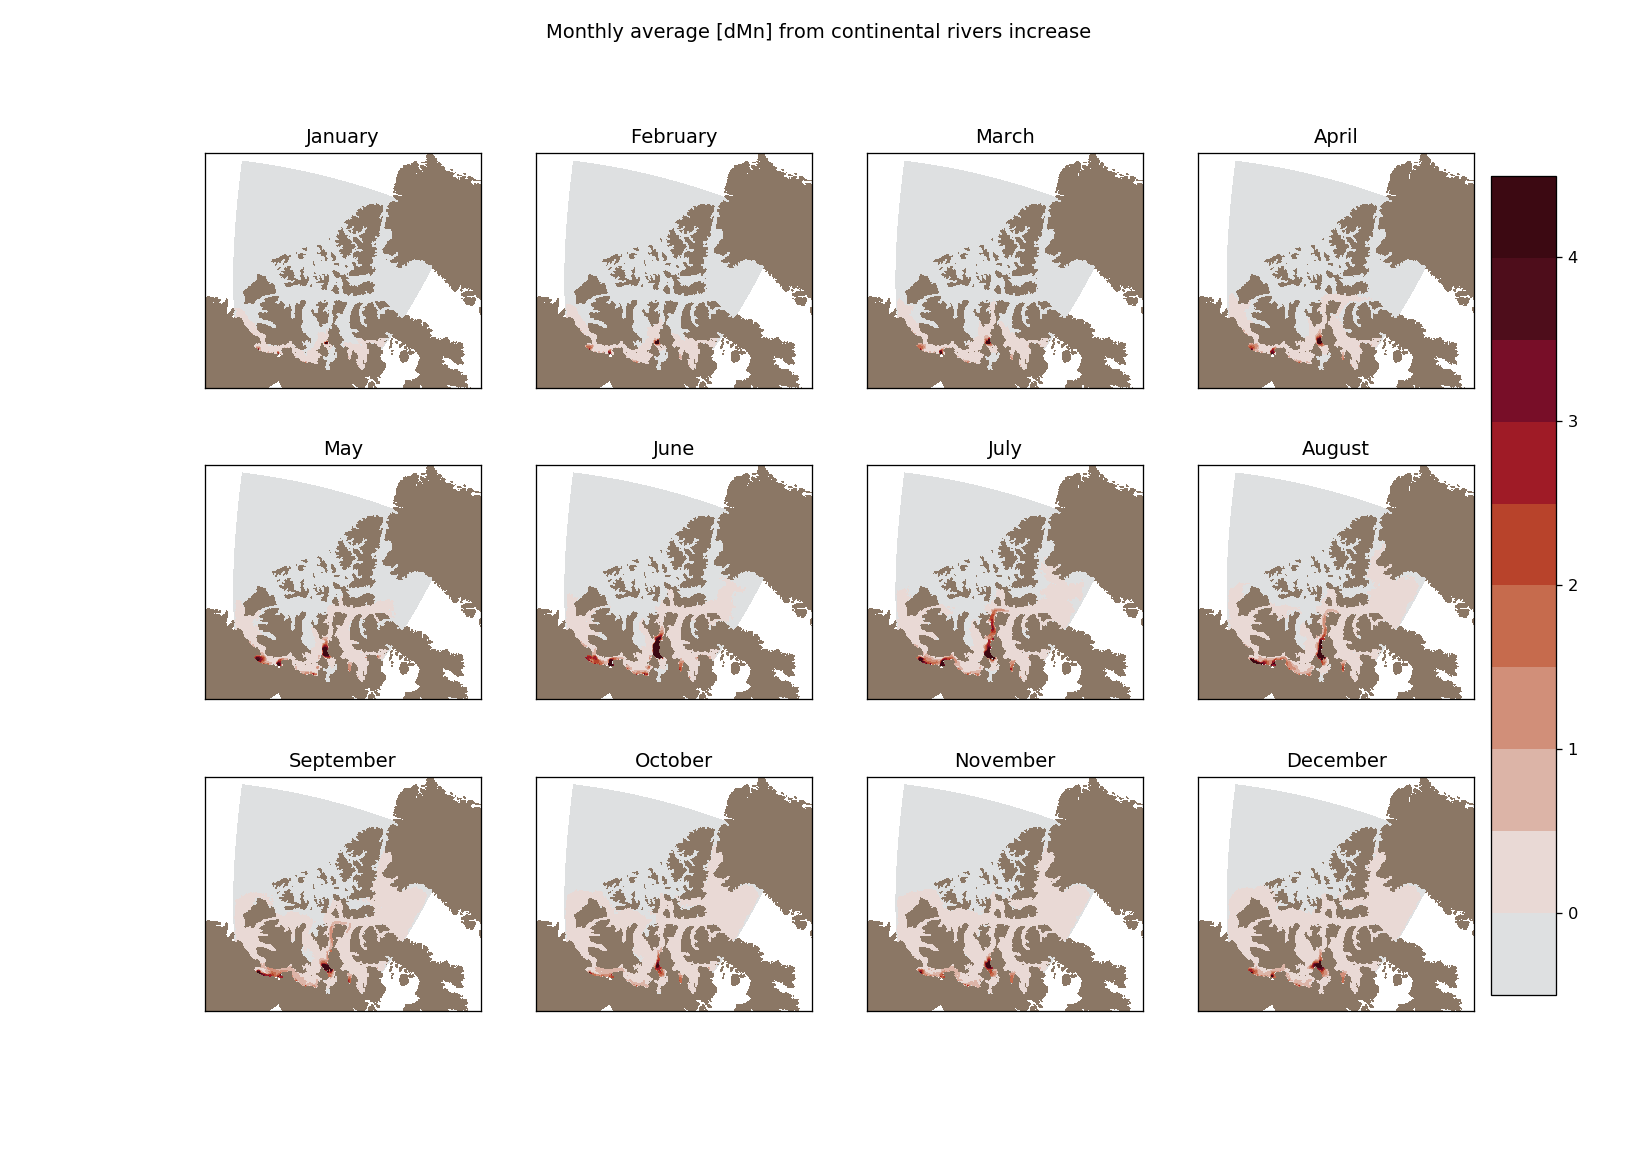

In [75]:
levels_ave = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 50]
vmin  = -4
vmax  = 4
months_overview(up_cont_dmn, 'Monthly average [dMn] from continental rivers increase', levels_ave, vmin, vmax)

Look at the month of June in more detail:

<IPython.core.display.Javascript object>


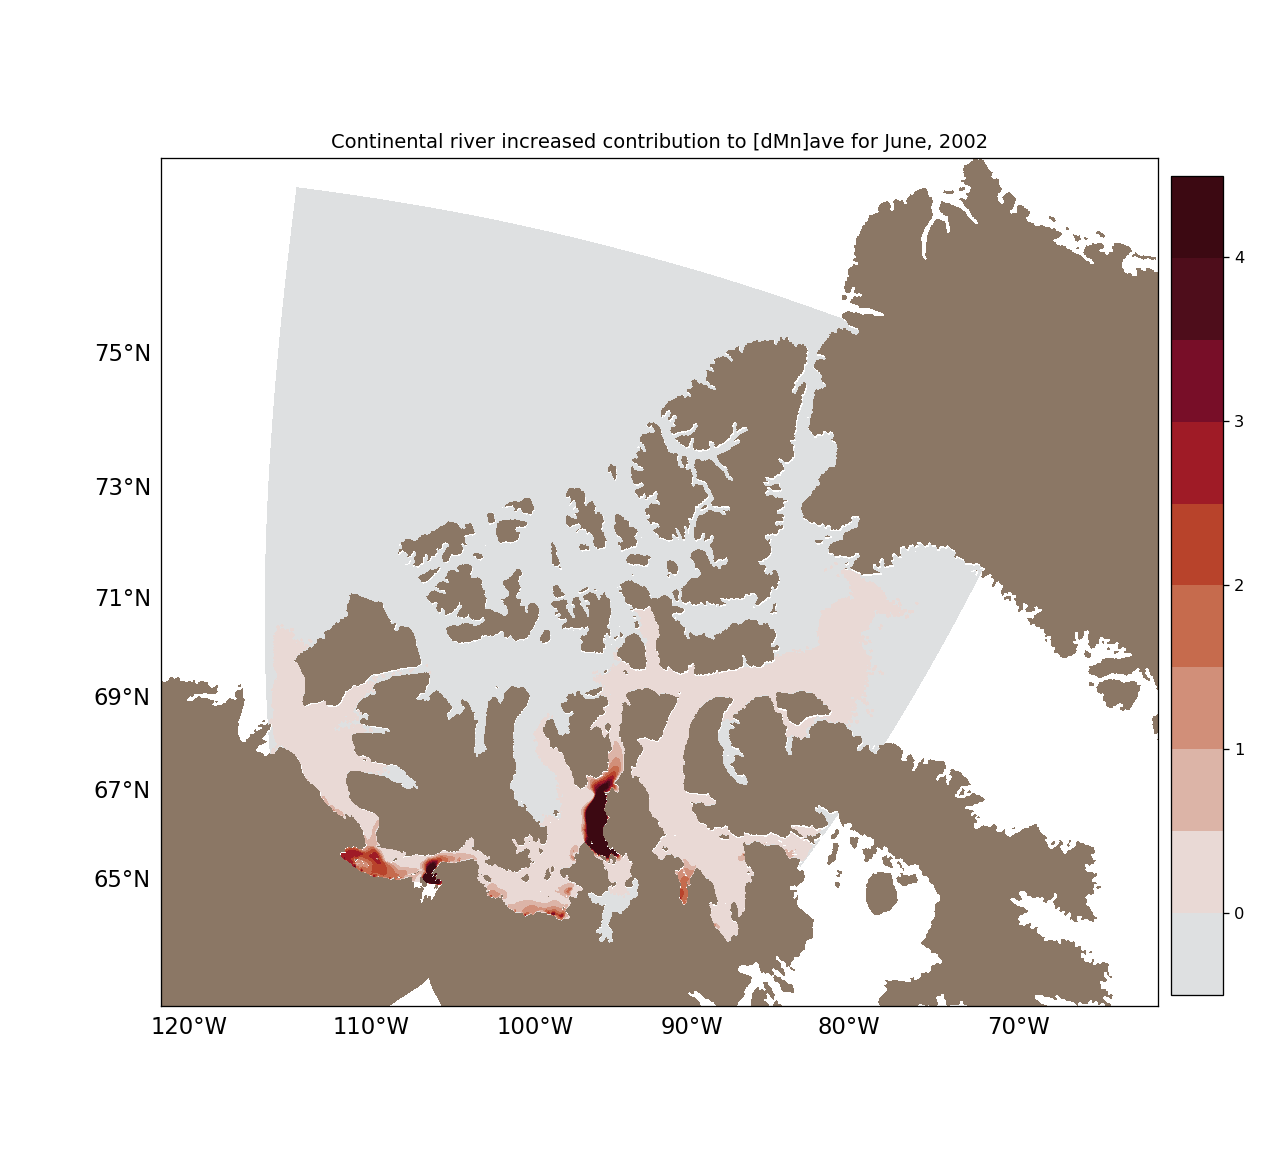

In [76]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_ave = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 50]
vmin  = -4
vmax  = 4
cbar = proj.contourf(x, y, up_cont_dmn[5,0,:,:], levels_ave, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('Continental river increased contribution to [dMn]ave for June, 2002')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

####  Difference between month-to-month change between riv_2c and riv_base

In [85]:
up_cont_ddiff = riv_2c_ddiff - riv_base_ddiff

In [86]:
print('Increased continental contribution to [dMn] month-to-month change: ')
print('Max: ', np.amax(up_cont_ddiff[:,:,:,:]))
print('Min: ', np.amin(up_cont_ddiff[:,:,:,:]))
print('Ave: ', np.average(up_cont_ddiff[:,:,:,:]))

Increased continental contribution to [dMn] month-to-month change: 
Max:  35.628113
Min:  -27.915691
Ave:  0.002390191284557469


<IPython.core.display.Javascript object>


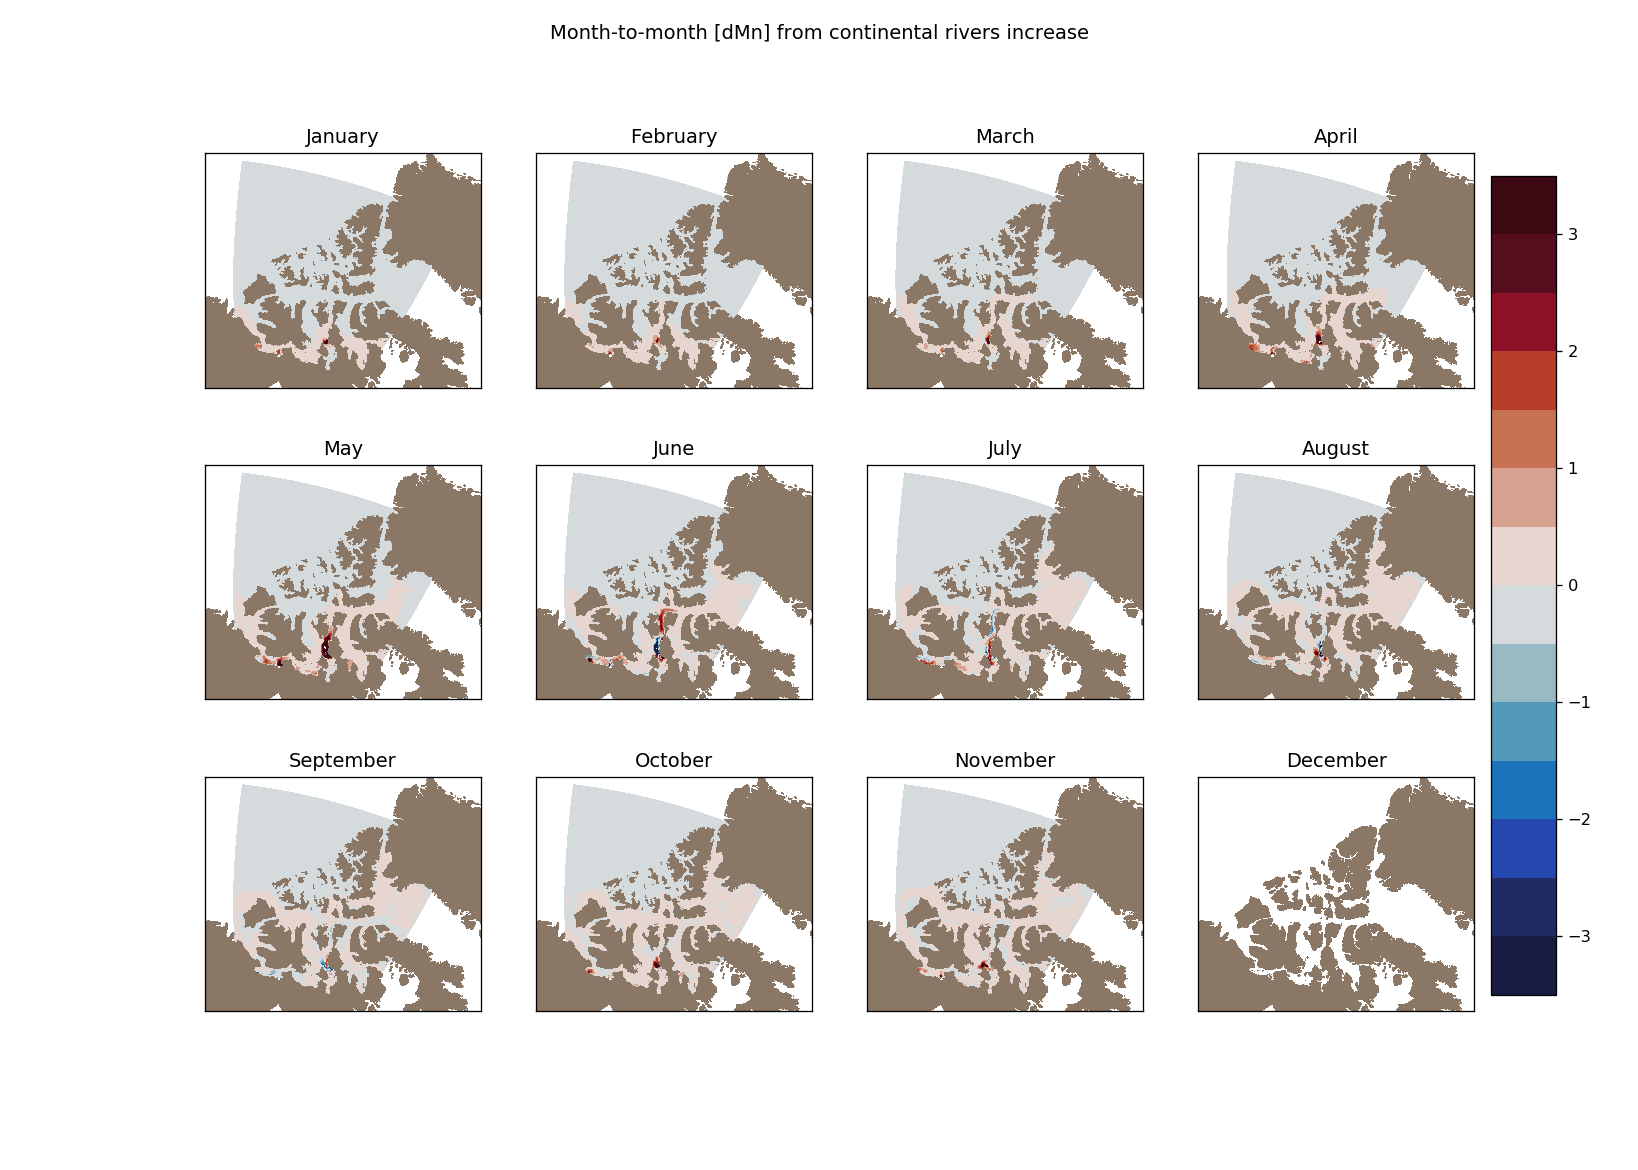

In [88]:
levels_diff = [-14, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 10]
vmin  = -3
vmax  = 3
months_overview(up_cont_ddiff, 'Month-to-month [dMn] from continental rivers increase', levels_diff, vmin, vmax, ave=False)

Look at the month of June in more detail:

<IPython.core.display.Javascript object>


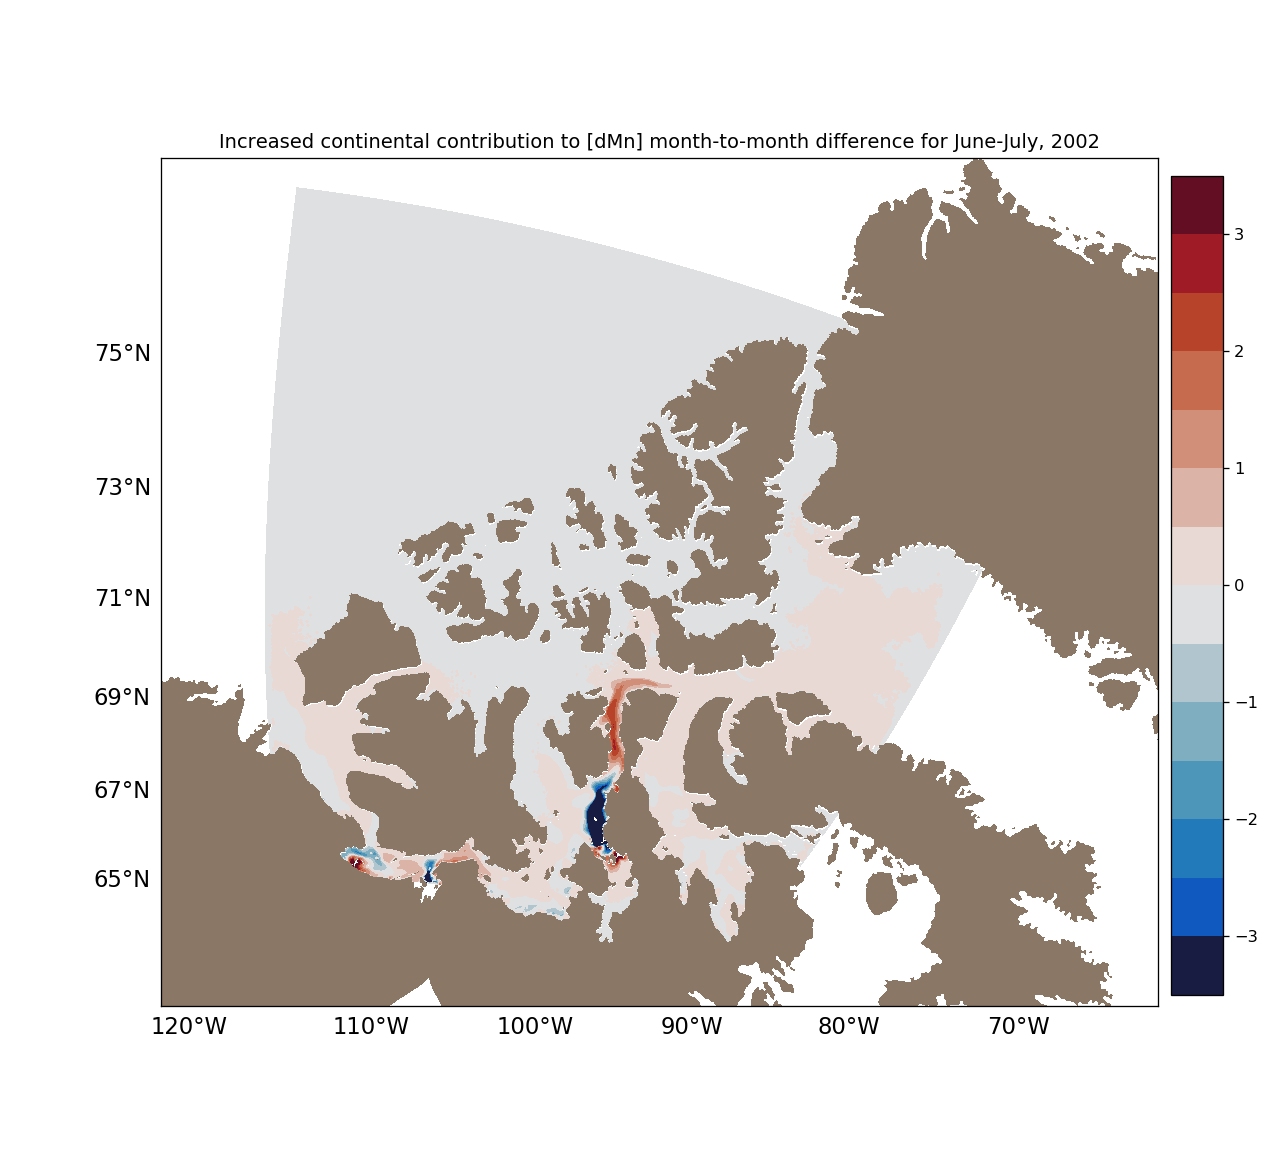

In [89]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_diff = [-15, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 4]
vmin  = -4
vmax  = 4
cbar = proj.contourf(x, y, up_cont_ddiff[5,0,:,:], levels_diff, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('Increased continental contribution to [dMn] month-to-month difference for June-July, 2002')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

## Continental river trace metal concentrations decreased:

Does a 50% decrease in trace metal concentrations (relative to base) flowing out of continental rivers have a strong impact on the Mn signatures in the CAA? To answer this question: compare outputs from riv_2b and riv_base runs.

####  Difference between riv_2b and riv_base monthly averages:

In [78]:
down_cont_dmn = riv_2b_dave - riv_base_dave

In [80]:
print('Continental decreased contribution to [dMn] monthly ave: ')
print('Max: ', np.amax(down_cont_dmn[:,:,:,:]))
print('Min: ', np.amin(down_cont_dmn[:,:,:,:]))
print('Ave: ', np.average(down_cont_dmn[:,:,:,:]))

Continental decreased contribution to [dMn] monthly ave: 
Max:  0.5233886
Min:  -52.07851
Ave:  -0.017071071191489623


<IPython.core.display.Javascript object>


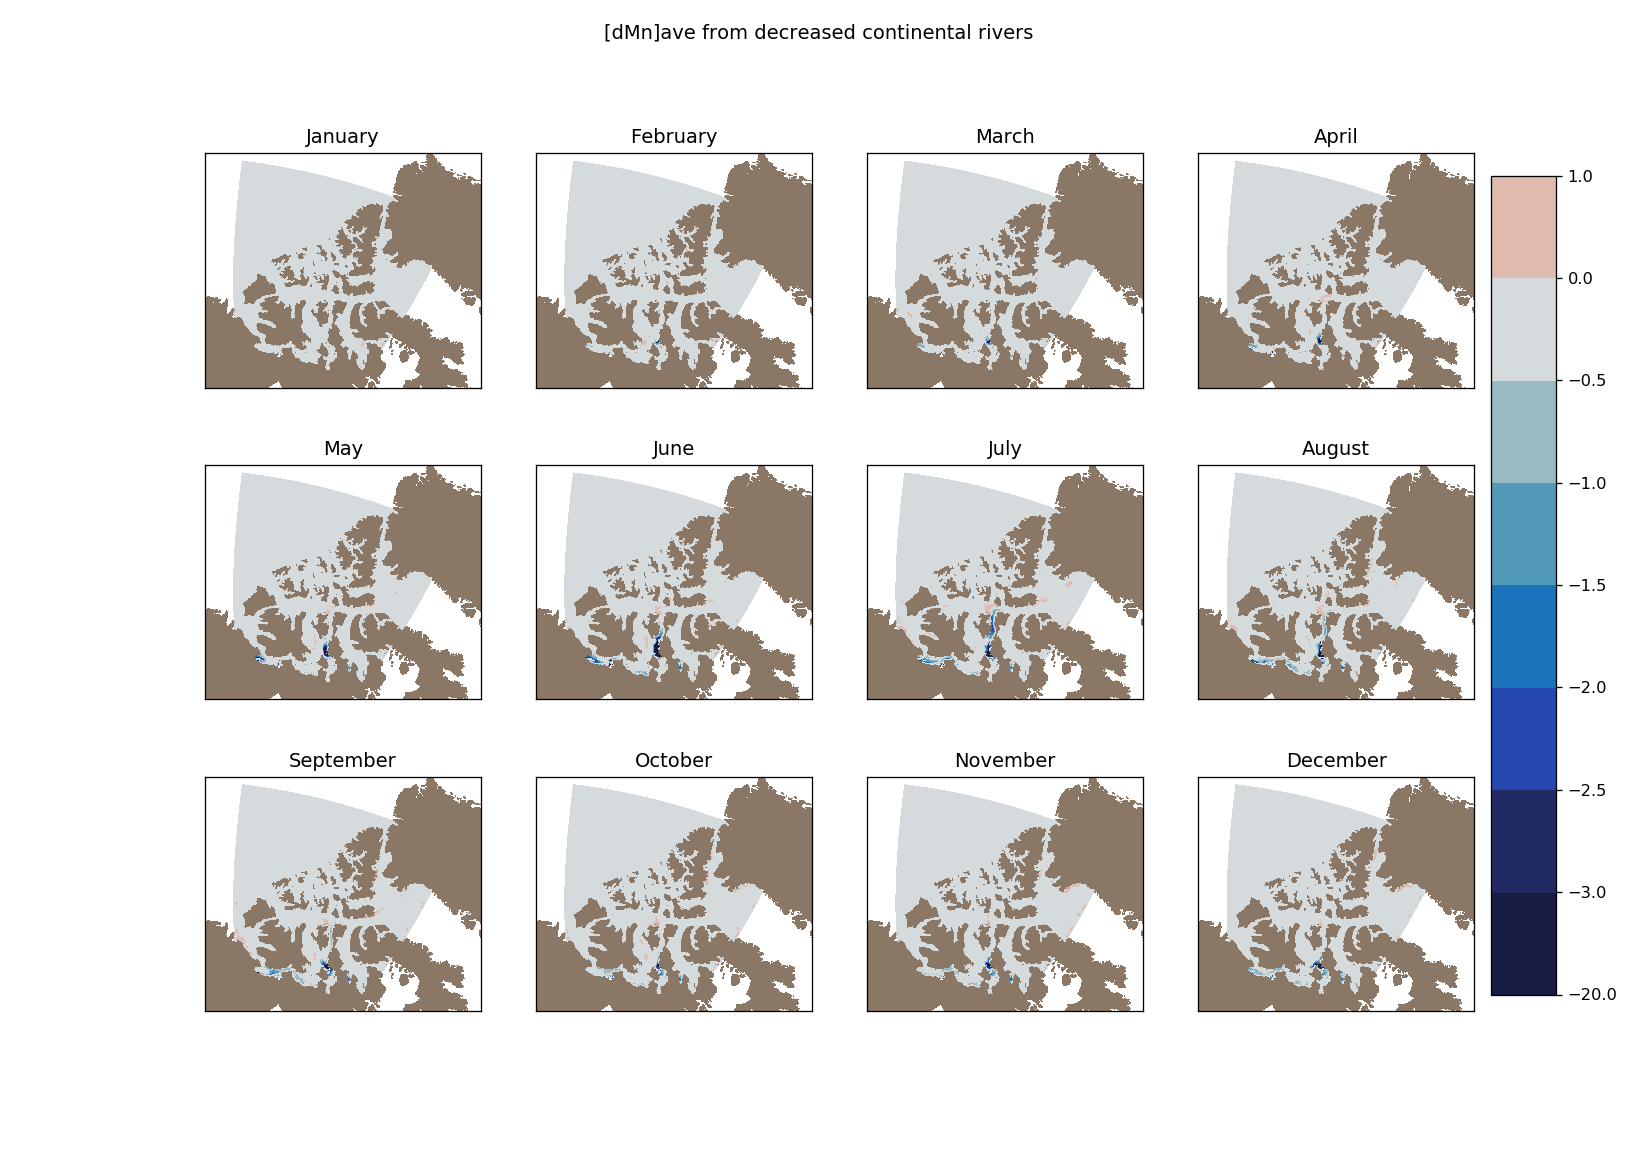

In [83]:
levels_ave = [-20, -3, -2.5, -2, -1.5, -1, -0.5, 0, 1]
vmin  = -3
vmax  = 3
months_overview(down_cont_dmn, '[dMn]ave from decreased continental rivers', levels_ave, vmin, vmax)

Look at the month of June in more detail:

<IPython.core.display.Javascript object>


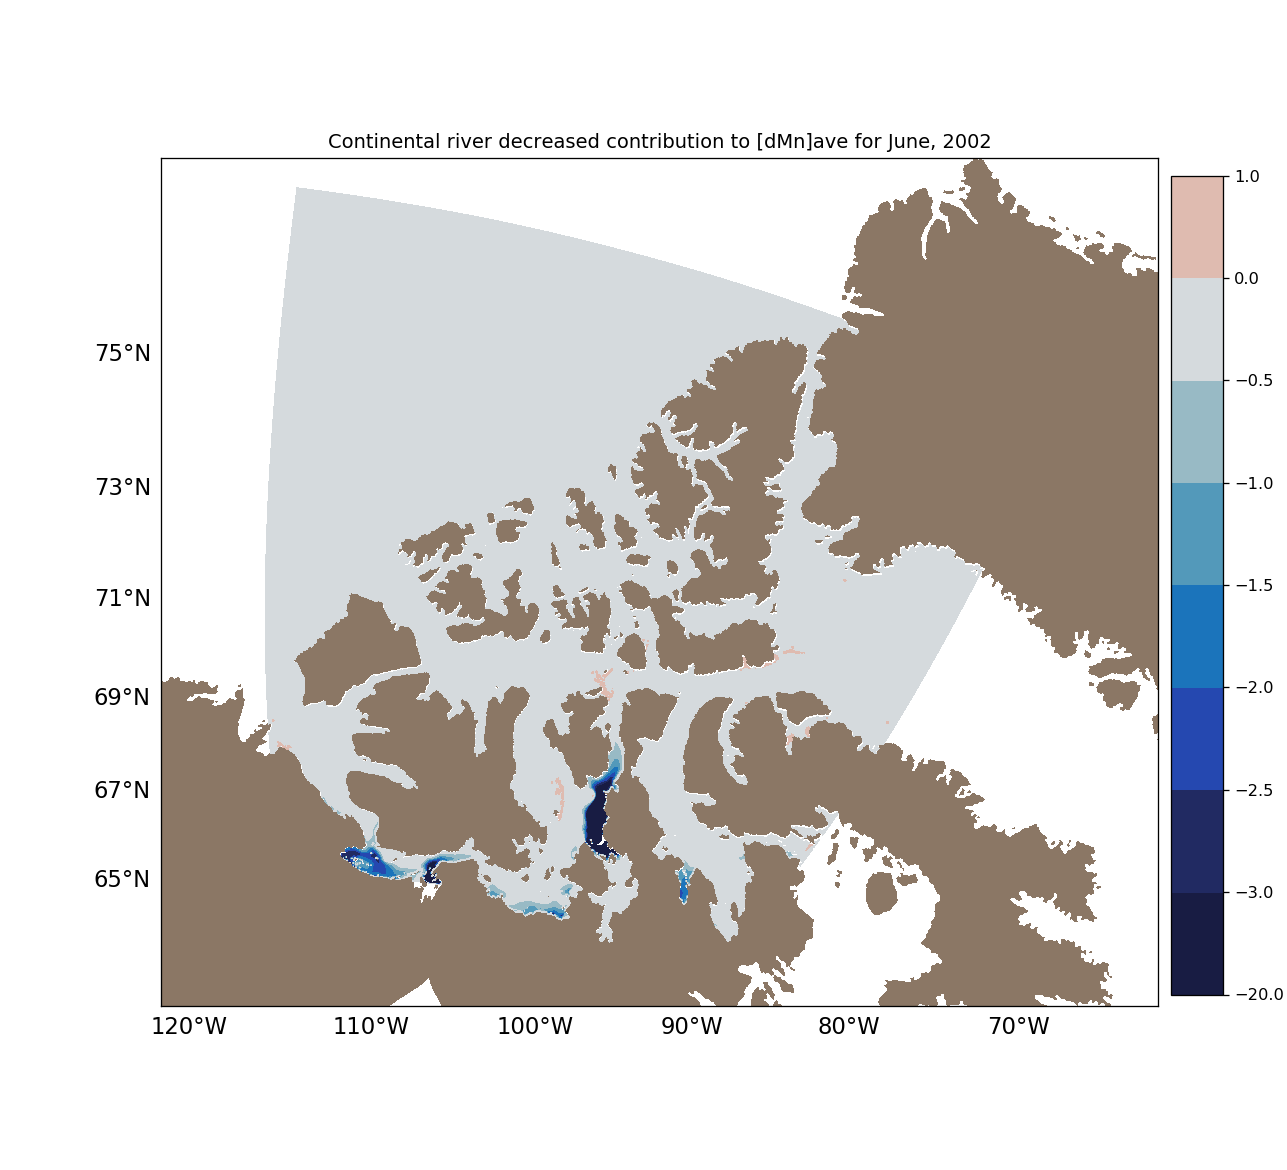

In [84]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_ave = [-20, -3, -2.5, -2, -1.5, -1, -0.5, 0, 1]
vmin  = -3
vmax  = 3
cbar = proj.contourf(x, y, down_cont_dmn[5,0,:,:], levels_ave, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('Continental river decreased contribution to [dMn]ave for June, 2002')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

####  Difference between month-to-month change between riv_2b and riv_base

In [90]:
down_cont_ddiff = riv_2b_ddiff - riv_base_ddiff

In [91]:
print('Decreased continental contribution to [dMn] month-to-month change: ')
print('Max: ', np.amax(down_cont_ddiff[:,:,:,:]))
print('Min: ', np.amin(down_cont_ddiff[:,:,:,:]))
print('Ave: ', np.average(down_cont_ddiff[:,:,:,:]))

Decreased continental contribution to [dMn] month-to-month change: 
Max:  27.898123
Min:  -35.6062
Ave:  -0.002395199041948568


<IPython.core.display.Javascript object>


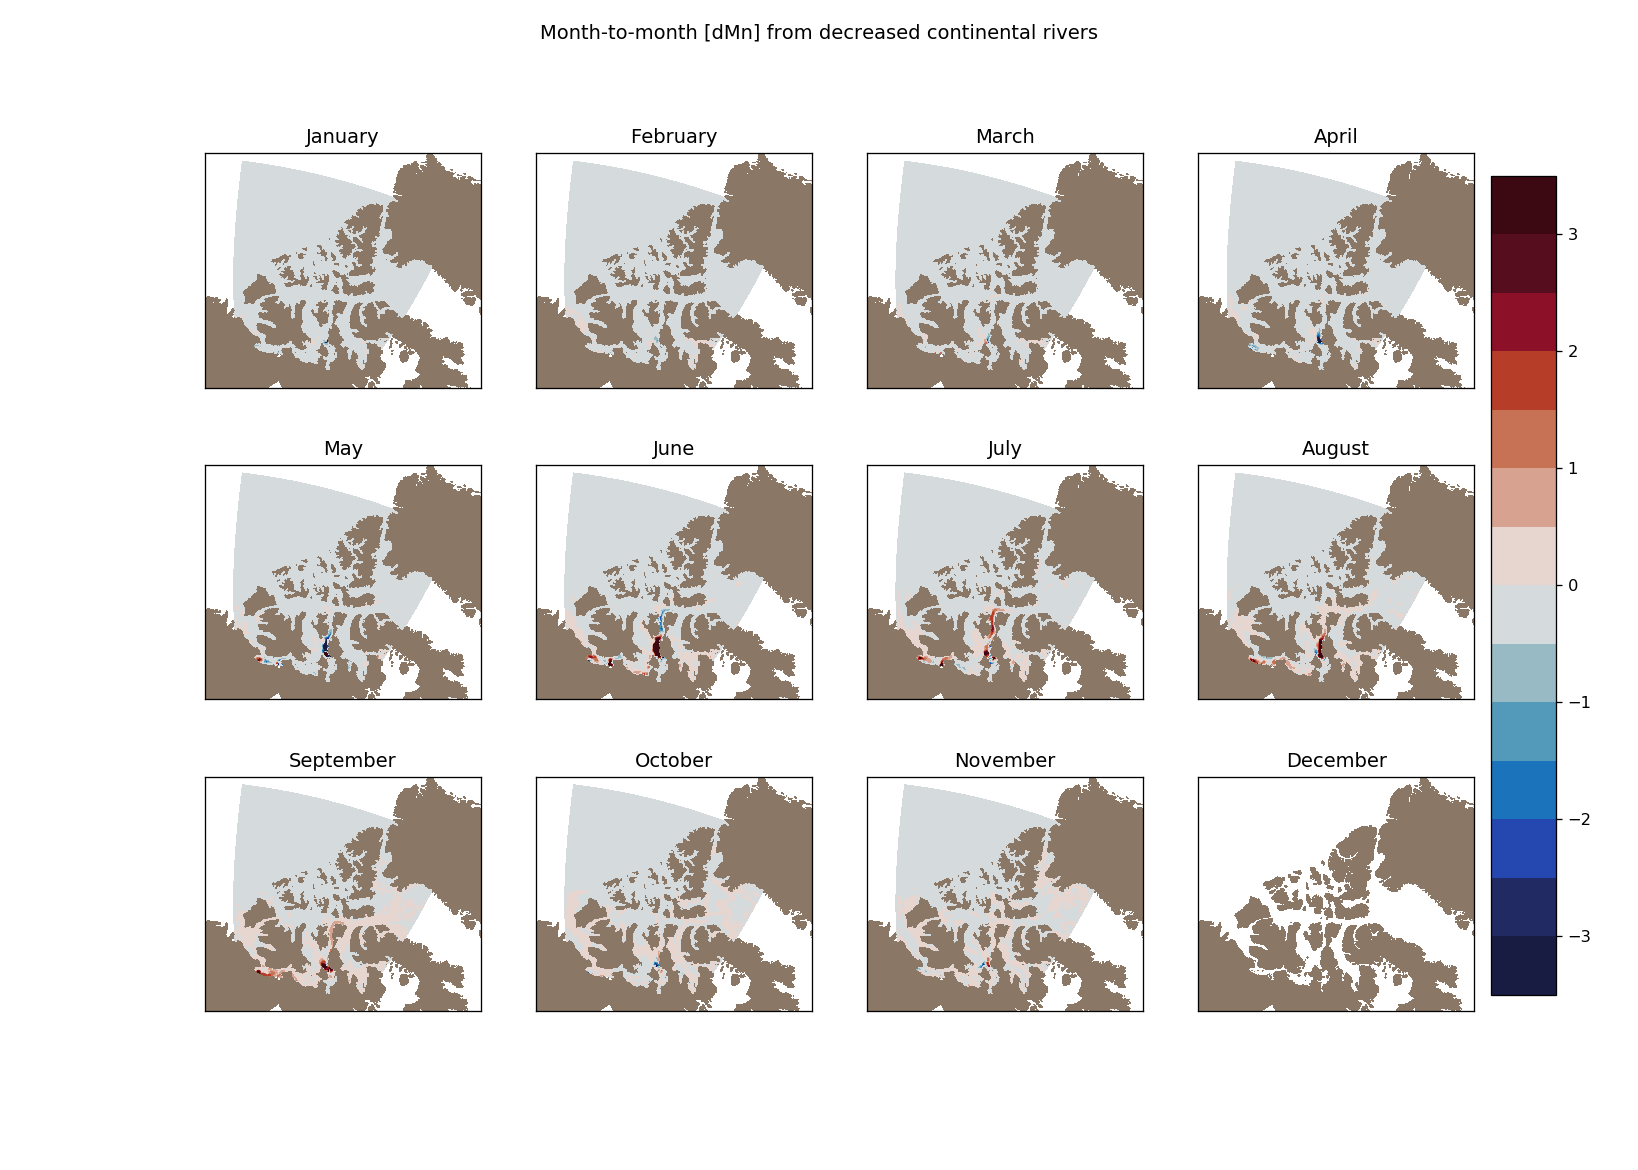

In [95]:
levels_diff = [-35, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 30]
vmin  = -3
vmax  = 3
months_overview(down_cont_ddiff, 'Month-to-month [dMn] from decreased continental rivers', levels_diff, vmin, vmax, ave=False)

Look at the month of June in more detail:

<IPython.core.display.Javascript object>


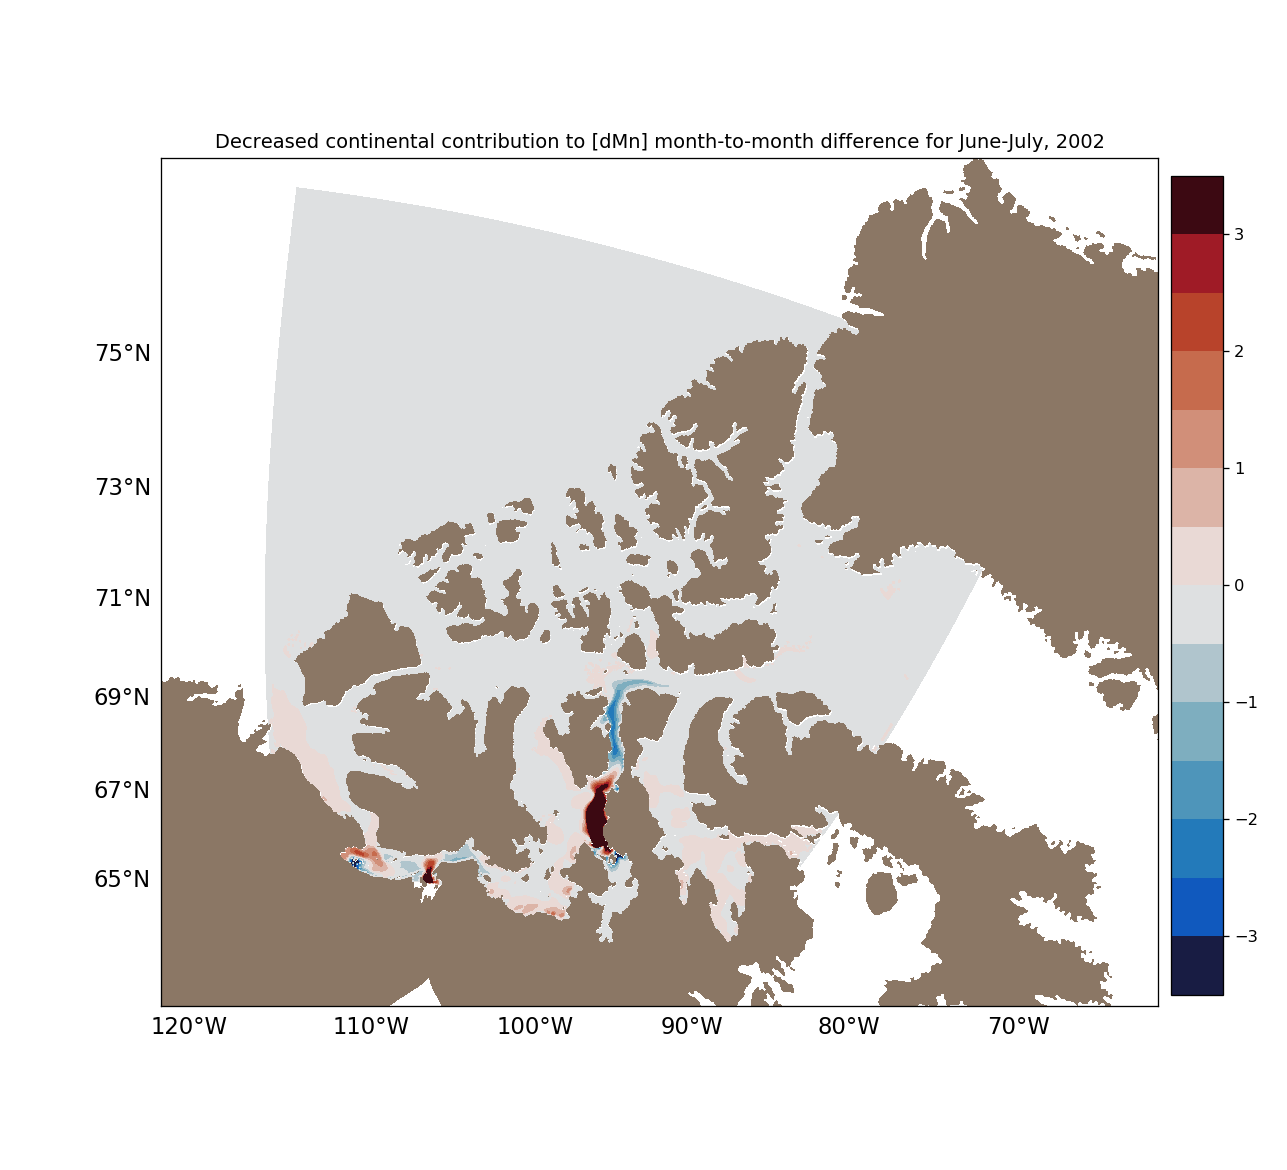

In [96]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_diff = [-35, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 30]
vmin  = -4
vmax  = 4
cbar = proj.contourf(x, y, down_cont_ddiff[5,0,:,:], levels_diff, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('Decreased continental contribution to [dMn] month-to-month difference for June-July, 2002')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);